In [197]:
import numpy as np

## K Means Clustering

Algorithm:
- select K to determine number of clusters
- select random K points or Centroids(cluster centers)
- Assign each data point to closest centroid, which will form K clusters
- Calculate **Variance** and place a new centroid of each cluster
    - higher variance means lower accuracy
    - lower variance means higher accuracy
- repeat step 3
- if a point is reassigned to another cluster, goto step 4 else **FINISH**

Iris Dataset:

**sepal_length**: Contains length of Sepal

**sepal_width**: Contains width of Sepal

**petal_length**: Contains length of Petal

**petal_width**: Contains width of Petal

Let's work with only two features

In [198]:
data = np.genfromtxt("iris-dataset.csv", delimiter=',')
data = data[1:, :2]
data[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [199]:
my_list = data.tolist()

In [200]:
import random
random.shuffle(my_list)

In [201]:
my_list[:10]

[[5.5, 2.4],
 [5.4, 3.9],
 [6.9, 3.2],
 [6.3, 2.5],
 [6.9, 3.1],
 [6.6, 3.0],
 [6.1, 2.8],
 [6.9, 3.1],
 [6.1, 2.8],
 [7.7, 2.6]]

#### Function to generate centroids:

- within a range of the len of the dataset, generate a random integer
    - this will be our initial rand centroid index from dataset
- take an empty centroids list and put the dataset values according to their indexes which were randomly generated
- return the centroids list

In [202]:
def generate_centroids(x, K):
    rand_idx = [np.random.randint(len(x)) for i in range(K)]
    centroids = [x[i] for i in rand_idx]
    return centroids

#### Function to assign clusters

- define a cluster 2d list. there should be K rows to differentiate each cluster
- calculate the euclidean distances of the point to each centroid
- pick the index of the minimum distance
- assign the data point to the row with the index that matches the minimum index
- return the cluster

In [203]:
def assign_cluster(x, centroids, K):
    cluster = [[] for i in range(K)]
    
    for i in range(len(x)):
        euclidean_distances = []
        
        for j in range(K):
            euclidean_distances.append(np.linalg.norm(np.subtract(x[i], centroids[j])))
        min_idx = np.argmin(euclidean_distances)
        cluster[min_idx].append(x[i])
    return cluster

#### Function to update centroid

- take the mean of each K clusters and assign them in the list
- the index of the data point in the centroids list represent the cluster number it is the centroid of 

In [204]:
def update_centroid(x,clusters,K):
    centroids = [np.mean(clusters[i], axis = 0) for i in range(K)]
    return centroids

### K Means:

- generate random centroid points
- assign clusters with the generated random centroid points
- keep the assigned clusters to a saved variable
- find out new centroids and clusters
- if the clusters changed, then repeat the steps of finding centroids and clusters again
- if it didn't finish the algorithm

In [277]:
def Kmeans(x, K=2):
#     K random centroids
    centroids = generate_centroids(x, K)
    cluster = assign_cluster(x, centroids, K)
    
    while True:
        init_cluster = cluster
        centroids = update_centroid(x, cluster, K)
        cluster = assign_cluster(x, centroids, K)
        if np.array_equal(np.asarray(cluster), (np.asarray(init_cluster))):
            break
            
    return cluster, centroids

In [278]:
K = 3
cluster, centroids = Kmeans(my_list, K)

C:\Users\USER\AppData\Local\Temp\ipykernel_21796\1149097970.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if np.array_equal(np.asarray(cluster), (np.asarray(init_cluster))):


In [279]:
cluster

[[[5.4, 3.9],
  [5.0, 3.5],
  [5.4, 3.9],
  [4.9, 3.1],
  [5.0, 3.0],
  [5.0, 3.4],
  [5.2, 3.4],
  [5.8, 4.0],
  [4.8, 3.4],
  [5.2, 3.5],
  [5.4, 3.7],
  [4.6, 3.4],
  [4.8, 3.0],
  [4.6, 3.2],
  [5.3, 3.7],
  [4.5, 2.3],
  [5.0, 3.3],
  [5.1, 3.4],
  [5.0, 3.4],
  [5.1, 3.3],
  [4.8, 3.0],
  [5.1, 3.8],
  [5.0, 3.6],
  [4.6, 3.6],
  [4.4, 2.9],
  [4.7, 3.2],
  [5.0, 3.5],
  [5.4, 3.4],
  [5.7, 4.4],
  [4.4, 3.0],
  [5.1, 3.7],
  [4.4, 3.2],
  [4.6, 3.1],
  [4.9, 3.1],
  [4.8, 3.4],
  [5.5, 4.2],
  [4.8, 3.1],
  [4.3, 3.0],
  [4.9, 3.0],
  [5.2, 4.1],
  [5.1, 3.5],
  [5.4, 3.4],
  [4.7, 3.2],
  [5.1, 3.8],
  [5.1, 3.5],
  [5.7, 3.8],
  [5.1, 3.8],
  [4.9, 3.1],
  [5.5, 3.5],
  [5.0, 3.2]],
 [[5.5, 2.4],
  [6.3, 2.5],
  [6.1, 2.8],
  [6.1, 2.8],
  [6.0, 2.2],
  [5.6, 2.7],
  [5.5, 2.3],
  [5.0, 2.3],
  [5.8, 2.8],
  [5.7, 3.0],
  [5.7, 2.6],
  [6.0, 2.7],
  [6.1, 2.9],
  [4.9, 2.4],
  [5.6, 2.5],
  [5.2, 2.7],
  [5.9, 3.2],
  [5.8, 2.7],
  [6.1, 3.0],
  [6.1, 2.6],
  [5.0, 2.0],
  [6.

In [280]:
centroids

[array([5.006, 3.418]),
 array([5.77358491, 2.69245283]),
 array([6.81276596, 3.07446809])]

In [209]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

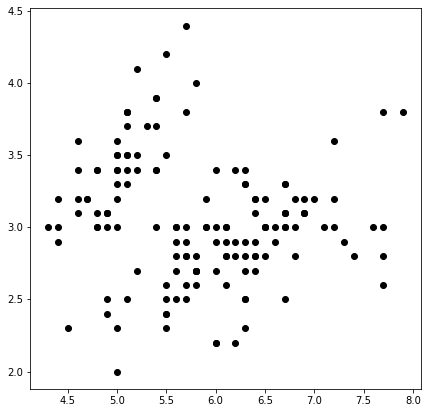

In [210]:
plt.figure(figsize=(7,7))
for i in range(len(my_list)):
        plt.scatter(my_list[i][0], my_list[i][1],color='k')

In [211]:
def plot_clusters(cluster, centroids, K):
    plt.figure(figsize=(7,7))
    colors = ["r","g","b","c","y","k","orange","limegreen"]
    for j in range(K):
        for i in range(len(cluster[j])):
            plt.scatter(cluster[j][i][0], cluster[j][i][1], color=colors[j])
        x_center = centroids[j][0]
        y_center = centroids[j][1]
        plt.plot(x_center, y_center, '*', color=colors[j], ms=12)

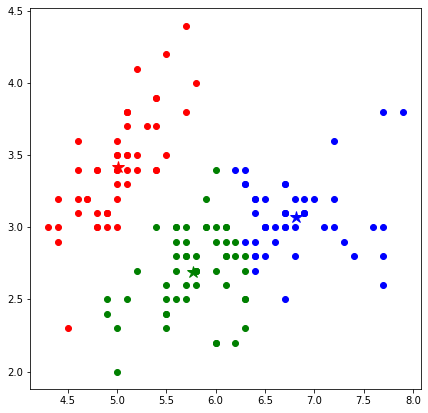

In [281]:
plot_clusters(cluster, centroids, K)

In [213]:
def calc_sse(cluster, centroids, k):
    sse = 0
    for i in range(k):
        for j in range(len(cluster[i])):
            sse += np.linalg.norm(np.subtract(cluster[i][j], centroids[i])) ** 2
    return sse

In [261]:
def see_algo_performance(x, epoch):
    K = []
    sses = []
    for k in range(2, epoch+1):
        clusters, centroids = Kmeans(x, k)
        
        sse = calc_sse(clusters, centroids, k)
        K.append(k)
        sses.append(sse)
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot()
    ax.set_title("Performance of K Means")
    ax.set_xlabel("Clusters (K)")
    ax.set_ylabel("Sum Squared Error (SSE)")
    ax.plot(K, sses)
    plt.show();

C:\Users\USER\AppData\Local\Temp\ipykernel_21796\1149097970.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if np.array_equal(np.asarray(cluster), (np.asarray(init_cluster))):


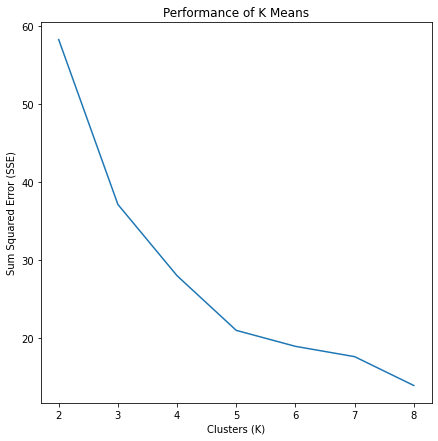

In [286]:
see_algo_performance(my_list, 8)

### Our SSE decreases as the number of clusters increase. Hence, the K means algorithm works